# Student Marks Prediction

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

study_hours  student_marks
0           6.83          78.50
1           6.56          76.74
2            NaN          78.68
3           5.67          71.82
4           8.67          84.19
..           ...            ...
195         7.53          81.67
196         8.56          84.68
197         8.94          86.75
198         6.60          78.05
199         8.35          83.50

[200 rows x 2 columns]

In [ ]:
df.shape

## Discover and visualize the data to gain insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

study_hours  student_marks
count   195.000000      200.00000
mean      6.995949       77.93375
std       1.253060        4.92570
min       5.010000       68.57000
25%       5.775000       73.38500
50%       7.120000       77.71000
75%       8.085000       82.32000
max       8.990000       86.99000

Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

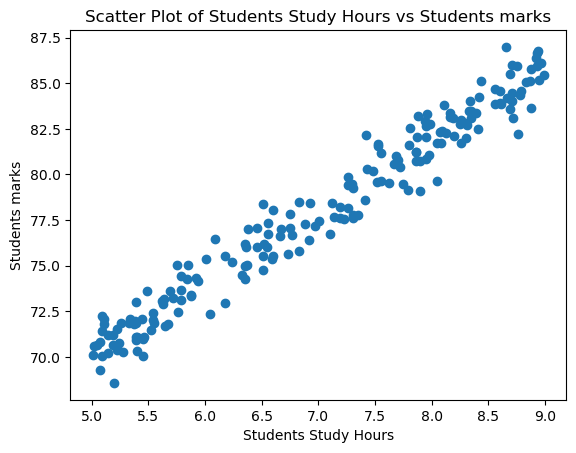

In [6]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [ ]:
# Data Cleaning

In [7]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [8]:
df.study_hours.mean()

6.9959487179487185

In [9]:
df2 = df.fillna(df.study_hours.mean())

In [10]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [11]:
# split dataset

In [12]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [14]:
X_train

study_hours
183     8.610000
190     5.790000
45      6.180000
128     6.380000
189     7.260000
..           ...
184     5.220000
165     5.380000
2       6.995949
155     5.140000
13      7.900000

[160 rows x 1 columns]

In [15]:
y_train

183    83.87
190    73.14
45     72.96
128    77.01
189    79.87
       ...  
184    71.50
165    71.94
2      78.68
155    70.20
13     80.76
Name: student_marks, Length: 160, dtype: float64

In [16]:
X_test

study_hours
145         8.95
114         7.12
46          7.01
162         7.79
94          7.69
170         5.19
49          5.09
69          8.25
22          5.05
176         8.93
78          5.09
124         8.69
177         5.79
21          8.16
71          5.11
118         5.69
80          8.34
140         8.60
15          6.55
133         5.76
103         7.31
86          5.88
146         7.99
148         8.30
40          5.28
37          7.19
38          5.62
111         6.37
72          6.35
81          7.94
180         6.97
95          6.09
23          5.85
113         7.95
60          5.49
70          5.37
79          5.88
17          8.44
89          8.79
161         7.30

In [17]:
y_test

145    85.15
114    78.42
46     77.46
162    79.17
94     81.01
170    71.18
49     71.41
69     82.79
22     70.67
176    85.96
78     70.05
124    83.57
177    73.64
21     83.36
71     71.79
118    73.61
80     84.00
140    84.58
15     76.03
133    72.46
103    79.26
86     73.40
146    82.75
148    82.02
40     70.27
37     78.21
38     73.08
111    75.04
72     74.97
81     82.93
180    77.19
95     76.48
23     75.02
113    80.86
60     73.61
70     71.80
79     73.34
17     85.11
89     84.60
161    79.49
Name: student_marks, dtype: float64

# Select a model and train it

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.coef_

array([3.92759224])

In [20]:
lr.intercept_

50.41547425152682

In [21]:
m = 3.92759224
c = 50.41547425152682
z  = m * 40 + c 
z

207.5191638515268

In [22]:
lr.predict([[40]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([207.51916388])

In [23]:
y_pred  = lr.predict(X_test)
y_pred

array([85.56742481, 78.37993101, 77.94789586, 81.01141781, 80.61865858,
       70.79967798, 70.40691876, 82.81811024, 70.24981507, 85.48887296,
       70.40691876, 84.54625082, 73.15623333, 82.46462694, 70.4854706 ,
       72.7634741 , 83.17159354, 84.19276752, 76.14120343, 73.03840556,
       79.12617353, 73.50971663, 81.79693626, 83.01448985, 71.15316128,
       78.65486246, 72.48854264, 75.43423683, 75.35568498, 81.60055664,
       77.79079217, 74.334511  , 73.39188886, 81.63983257, 71.97795565,
       71.50664458, 73.50971663, 83.56435276, 84.93901005, 79.08689761])

In [24]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 8.95      , 85.15      , 85.56742481],
       [ 7.12      , 78.42      , 78.37993101],
       [ 7.01      , 77.46      , 77.94789586],
       [ 7.79      , 79.17      , 81.01141781],
       [ 7.69      , 81.01      , 80.61865858],
       [ 5.19      , 71.18      , 70.79967798],
       [ 5.09      , 71.41      , 70.40691876],
       [ 8.25      , 82.79      , 82.81811024],
       [ 5.05      , 70.67      , 70.24981507],
       [ 8.93      , 85.96      , 85.48887296],
       [ 5.09      , 70.05      , 70.40691876],
       [ 8.69      , 83.57      , 84.54625082],
       [ 5.79      , 73.64      , 73.15623333],
       [ 8.16      , 83.36      , 82.46462694],
       [ 5.11      , 71.79      , 70.4854706 ],
       [ 5.69      , 73.61      , 72.7634741 ],
       [ 8.34      , 84.        , 83.17159354],
       [ 8.6       , 84.58      , 84.19276752],
       [ 6.55      , 76.03      , 76.14120343],
       [ 5.76      , 72.46      , 73.03840556],
       [ 7.31      , 79.26      , 79.126

In [25]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

study_hours  student_marks_original  student_marks_predicted
0          8.95                   85.15                85.567425
1          7.12                   78.42                78.379931
2          7.01                   77.46                77.947896
3          7.79                   79.17                81.011418
4          7.69                   81.01                80.618659
5          5.19                   71.18                70.799678
6          5.09                   71.41                70.406919
7          8.25                   82.79                82.818110
8          5.05                   70.67                70.249815
9          8.93                   85.96                85.488873
10         5.09                   70.05                70.406919
11         8.69                   83.57                84.546251
12         5.79                   73.64                73.156233
13         8.16                   83.36                82.464627
14         5.11                   71.79                70.485471
15         5.69                   73.61                72.763474
16         8.34                   84.00                83.171594
17         8.60                   84.58                84.192768
18         6.55                   76.03                76.141203
19         5.76                   72.46                73.038406
20         7.31                   79.26                79.126174
21         5.88                   73.40                73.509717
22         7.99                   82.75                81.796936
23         8.30                   82.02                83.014490
24         5.28                   70.27                71.153161
25         7.19                   78.21                78.654862
26         5.62                   73.08                72.488543
27         6.37                   75.04                75.434237
28         6.35                   74.97                75.355685
29         7.94                   82.93                81.600557
30         6.97                   77.19                77.790792
31         6.09                   76.48                74.334511
32         5.85                   75.02                73.391889
33         7.95                   80.86                81.639833
34         5.49                   73.61                71.977956
35         5.37                   71.80                71.506645
36         5.88                   73.34                73.509717
37         8.44                   85.11                83.564353
38         8.79                   84.60                84.939010
39         7.30                   79.49                79.086898

## Fine-tune your model

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
mean_squared_error(y_test,y_pred)

0.7555026319831513

In [29]:
r2_score(y_test,y_pred)

0.9692913292893555

In [26]:
lr.score(X_test,y_test)

0.9692913292893555

In [ ]:
plt.scatter(X_train,y_train)  

In [ ]:
lr.predict(X_train)

In [ ]:
plt.scatter(X_train, lr.predict(X_train))

In [ ]:
plt.plot(X_train, lr.predict(X_train), 'r-')

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")